<a href="https://colab.research.google.com/github/ujjwalchandurkar11/Deep-Learning/blob/main/Regression_Kreas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression with keras

In [4]:
 from warnings import filterwarnings
 filterwarnings('ignore')

Step 1: Read the dataset

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Step 2: Perform basic data quality checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.duplicated().sum()

41

In [9]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [10]:
df = df.drop_duplicates(keep="first")
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


Seperate X and Y (PE)

In [11]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Preprocess X using pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps= [('impute', SimpleImputer(strategy='mean')),
                            ('Scale', StandardScaler())]).set_output(transform = 'pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


Apply Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state =42)

In [18]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [19]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [20]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [21]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [22]:
xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

In [24]:
xtrain.shape[1]

4

Step 5: Build the neural network

Hidden layer use relu as activation function

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [26]:
# Initiate the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense hidden layer 1
model.add(Dense(16, activation='relu'))

# Add Dense hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='relu'))

In [27]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [28]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 204030.9062 - mae: 451.3252 - val_loss: 198529.6250 - val_mae: 445.0669
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 181918.4219 - mae: 425.2401 - val_loss: 157125.9531 - val_mae: 394.2278
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 122504.2500 - mae: 342.9803 - val_loss: 84294.8516 - val_mae: 279.2232
Epoch 4/60
239/239 [==============================] - 1s 6ms/step - loss: 56723.3281 - mae: 218.8633 - val_loss: 33431.6328 - val_mae: 163.3312
Epoch 5/60
239/239 [==============================] - 1s 5ms/step - loss: 24074.0195 - mae: 135.1111 - val_loss: 16367.8203 - val_mae: 109.2613
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 13906.4043 - mae: 100.8378 - val_loss: 10971.0479 - val_mae: 89.1700
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 9324.5977 - mae: 82.0239 - val_loss: 7271.1953 - val_mae: 

In [29]:
hist.history["loss"]

[204030.90625,
 181918.421875,
 122504.25,
 56723.328125,
 24074.01953125,
 13906.404296875,
 9324.59765625,
 6061.6728515625,
 3783.7392578125,
 2356.24169921875,
 1549.5870361328125,
 1095.5780029296875,
 822.6923828125,
 640.078125,
 506.33575439453125,
 405.4730529785156,
 324.99456787109375,
 260.8164978027344,
 208.80258178710938,
 166.62673950195312,
 132.90286254882812,
 106.04049682617188,
 85.33888244628906,
 70.0066909790039,
 58.599483489990234,
 50.08859634399414,
 43.887290954589844,
 39.142757415771484,
 35.34910583496094,
 32.464054107666016,
 29.88869285583496,
 27.65848731994629,
 25.766590118408203,
 24.225826263427734,
 23.366559982299805,
 22.72919273376465,
 22.392284393310547,
 21.934797286987305,
 21.763099670410156,
 21.560197830200195,
 21.490768432617188,
 21.428464889526367,
 21.157190322875977,
 21.093135833740234,
 21.138774871826172,
 21.115388870239258,
 21.258291244506836,
 21.133621215820312,
 21.067258834838867,
 20.943979263305664,
 20.97604560852050

In [30]:
hist.history["val_loss"]

[198529.625,
 157125.953125,
 84294.8515625,
 33431.6328125,
 16367.8203125,
 10971.0478515625,
 7271.1953125,
 4606.22705078125,
 2828.2041015625,
 1789.0552978515625,
 1220.7791748046875,
 892.3430786132812,
 685.123291015625,
 540.4729614257812,
 430.90155029296875,
 346.2986755371094,
 277.76763916015625,
 222.1061553955078,
 176.78103637695312,
 140.5106201171875,
 112.59119415283203,
 91.62178802490234,
 73.64419555664062,
 61.50944900512695,
 52.203330993652344,
 45.36177444458008,
 40.8328971862793,
 36.01467514038086,
 32.72555160522461,
 29.998199462890625,
 28.102245330810547,
 25.94261360168457,
 24.359010696411133,
 23.61669158935547,
 22.738666534423828,
 21.95887565612793,
 22.284257888793945,
 21.32330322265625,
 21.153804779052734,
 20.9035701751709,
 20.829957962036133,
 20.868635177612305,
 21.079500198364258,
 20.875099182128906,
 21.822118759155273,
 20.475500106811523,
 21.798803329467773,
 20.551319122314453,
 20.91910743713379,
 20.776714324951172,
 20.505470275

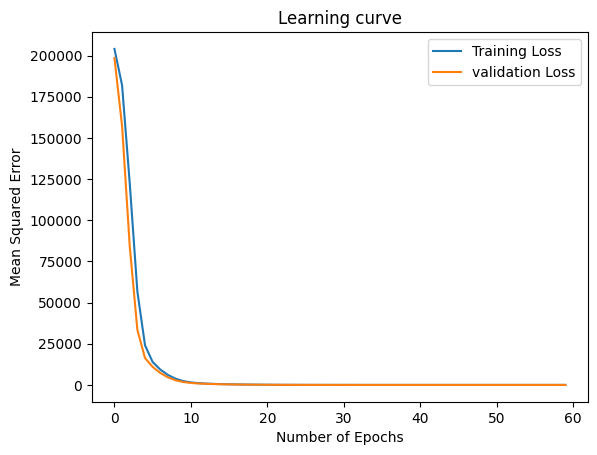

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label = "Training Loss")
plt.plot(hist.history["val_loss"], label="validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning curve")
plt.legend()
plt.show()

In [32]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 21.0086 - mae: 3.5890


[21.008621215820312, 3.588977336883545]

In [33]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 20.7049 - mae: 3.5918


[20.70492935180664, 3.5918006896972656]

Predict the results for train and test

In [34]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 3ms/step


In [36]:
ypred_train[0:5]

array([[451.35654],
       [479.0109 ],
       [469.25735],
       [431.91074],
       [467.2659 ]], dtype=float32)

In [37]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [38]:
ypred_test[0:5]

array([[427.10513],
       [480.44455],
       [481.8721 ],
       [449.92972],
       [446.63455]], dtype=float32)

In [39]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [40]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9269074641570265

In [41]:
# R2 score in test
r2_score(ytest, ypred_test)

0.9313928619031404

Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [43]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [44]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('Scale', StandardScaler())])

In [45]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [46]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 4ms/step


array([[445.79562],
       [436.1578 ],
       [431.95218],
       [440.3065 ],
       [474.4753 ]], dtype=float32)

In [47]:
xnew["PowerOutput_pred"] = preds

In [48]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.795624
1,28.88,54.89,1007.16,46.60,436.157806
2,27.89,73.21,1001.32,85.88,431.952179
3,25.69,62.26,1011.38,74.08,440.306488
4,12.16,40.81,1025.79,70.97,474.475311
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.033447
96,11.78,39.96,1011.37,82.95,471.620331
97,5.62,41.38,1020.91,86.21,484.203552
98,24.96,74.99,1008.25,80.52,436.218903


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

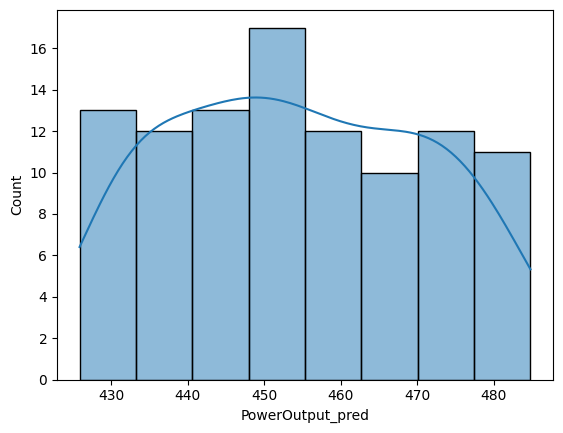

In [51]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [52]:
xnew.to_csv("Results.csv", index=False)